In [84]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./chipotle.tsv',sep = '\t')
import warnings
warnings.filterwarnings('ignore')

# 전처리

In [85]:
#df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))

In [86]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [88]:
df['item_name'] = df['item_name'].str.replace('-', ' ') # item_name에서 -로 구분된 아이템들 삭제

df['item_price'] = df['item_price'].apply(lambda x: float(x[1:])) #item_price의 $표시 삭제 후 float형 변환

df['order_id'] = df['order_id'].astype('object') #order_id는 고유값이므로 int가 아닌 object로 취급해야함.
df['item_price'] = df['item_price'].astype('float') #item_price는 가격이므로 object가 아닌 float로 취급해야함.

In [89]:
# price_list = []
# for i in range(len(df['item_price'])):
#     price_list.append(df['item_price'][i].strip().split('$')[1])    # item_price 중 달러 뒤 숫자만 추출(수이지만 object타입임)
# df.drop(['item_price'], axis = 1, inplace = True) # item_price 열 삭제
# df['item_price'] = price_list # item_price를 새로 생성

### 카테고리, 평균가격 만들기

In [90]:
Chips = ['Chips and Fresh Tomato Salsa','Side of Chips','Chips and Guacamole',
        'Chips and Tomatillo Green Chili Salsa','Chips',
         'Chips and Tomatillo Red Chili Salsa','Chips and Roasted Chili Corn Salsa',
         'Chips and Mild Fresh Tomato Salsa']
Drinks = ['Izze','Nantucket Nectar','Canned Soda','Bottled Water','Canned Soft Drink','6 Pack Soft Drink']
Salad = ['Chicken Salad','Steak Salad','Veggie Salad', 'Carnitas Salad','Salad']
Tacos = ['Steak Soft Tacos', 'Chicken Crispy Tacos', 'Chicken Soft Tacos',  'Barbacoa Soft Tacos', 
         'Steak Crispy Tacos', 'Barbacoa Crispy Tacos', 'Carnitas Soft Tacos', 
         'Crispy Tacos', 'Carnitas Crispy Tacos', 'Veggie Soft Tacos', 'Veggie Crispy Tacos']
Burrito = ['Steak Burrito', 'Chicken Burrito', 'Veggie Burrito', 'Barbacoa Burrito', 'Carnitas Burrito', 'Burrito' ]
Bowl =['Chicken Bowl','Steak Bowl','Chicken Salad Bowl','Veggie Bowl','Carnitas Bowl','Barbacoa Bowl','Steak Salad Bowl',
       'Veggie Salad Bowl','Barbacoa Salad Bowl','Carnitas Salad Bowl','Bowl']

In [91]:
df_chips = pd.DataFrame({'item_name':Chips, 'category':'Chips'})
df_drinks = pd.DataFrame({'item_name':Drinks, 'category':'Drinks'})
df_salad = pd.DataFrame({'item_name':Salad, 'category':'Salad'})
df_tacos = pd.DataFrame({'item_name':Tacos, 'category':'Tacos'})
df_burrito = pd.DataFrame({'item_name':Burrito, 'category':'Burrito'})
df_bowl = pd.DataFrame({'item_name':Bowl, 'category': 'Bowl'})
df_cat = pd.concat([df_chips, df_drinks, df_salad, df_tacos, df_burrito, df_bowl], axis=0)

In [92]:
df_temp = pd.merge(df, df_cat, on='item_name')
pd.options.display.float_format = '{:.2f}'.format
df_mean_price = df_temp.groupby('item_name')['item_price'].agg([('mean_price','sum')])
df_mean_price['mean_price'] = df_mean_price['mean_price']/df_temp.groupby('item_name')['quantity'].sum()

In [93]:
df_result = pd.merge(df_temp, df_mean_price, on='item_name')
df_result = df_result[['order_id', 'quantity', 'category', 'item_name', 'choice_description', 'item_price', 'mean_price']]
df_result

,order_id,quantity,category,item_name,choice_description,item_price,mean_price
0,1,1,Chips,Chips and Fresh Tomato Salsa,NaN,2.39,2.78
1,13,1,Chips,Chips and Fresh Tomato Salsa,NaN,2.39,2.78
2,25,1,Chips,Chips and Fresh Tomato Salsa,NaN,2.39,2.78
3,39,1,Chips,Chips and Fresh Tomato Salsa,NaN,2.95,2.78
4,82,1,Chips,Chips and Fresh Tomato Salsa,NaN,2.95,2.78
...,...,...,...,...,...,...,...
4617,1192,1,Salad,Veggie Salad,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
4618,1263,1,Salad,Veggie Salad,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.49,8.49
4619,1395,1,Salad,Veggie Salad,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.49,8.49
4620,1635,1,Salad,Veggie Salad,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.49,8.49


# 1. 대분류별 시각화

In [94]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [95]:
fig = plt.figure(figsize = (110,150))
menulist = ['Bowl','Burrito','Tacos','Chips','Salad','Drinks']
for i in range(1,7):
    ax = fig.add_subplot(6,1,i)
    plt.bar(df_result.groupby(df_c[df_c['category'] == menulist[i-1]].item_name).sum().quantity.sort_values(ascending = False).index, 
            df_result.groupby(df_c[df_c['category'] == menulist[i-1]].item_name).sum().quantity.sort_values(ascending = False).values,
            color = 'green',edgecolor = 'black', linewidth = 5)
    plt.title(f'{menulist[i-1]}', fontsize = 100)
    plt.xlabel(f'{menulist[i-1]} 종류', fontsize = 70)
    plt.ylabel('주문량',fontsize = 70)
    plt.xticks(fontsize = 40)
    plt.yticks(fontsize = 40)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


# 2. 전체 매출량, 판매량

In [97]:
df_result_sum = df_result.groupby(['category']).sum()
df_result_sum

,quantity,item_price,mean_price
category,,,
Bowl,1398,13837.16,13179.26
Burrito,1231,11899.00,11331.65
Chips,1171,3775.38,3513.39
Drinks,792,1401.71,1231.70
Salad,22,191.48,191.48
Tacos,358,3395.43,3272.43


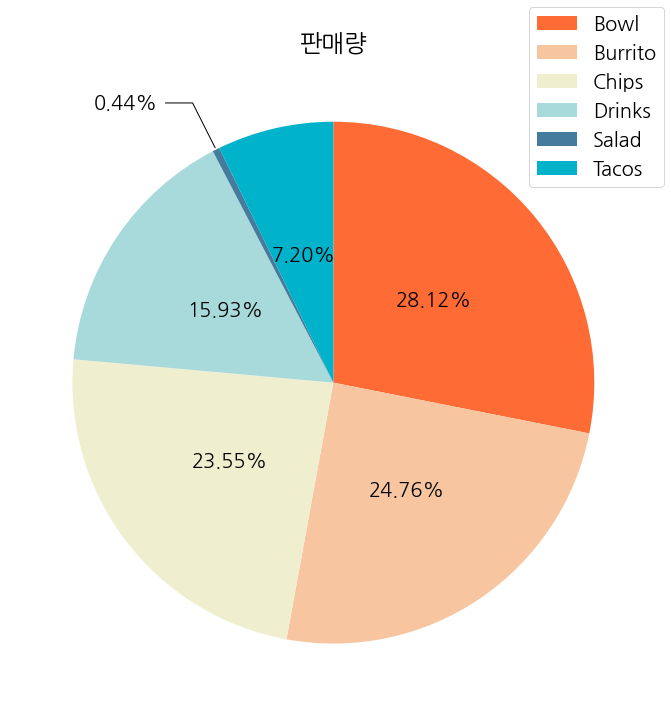

In [111]:
colors = ['#FF6B35','#F7C59F','#EFEFD0','#A8DADC','#457B9D','#00B2CA', 'indigo', 'hotpink'] ## 색상
labels = df_result_sum.index
frequency = df_result_sum['quantity']

fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.rc('font', size=20)
plt.title('판매량')
plt.rc('font', family='NanumGothic')

pie = ax.pie(frequency, startangle=90, counterclock=False, colors = colors)
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
    
plt.legend(pie[0],labels,loc=(0.8,0.8)) ## 범례
plt.show()

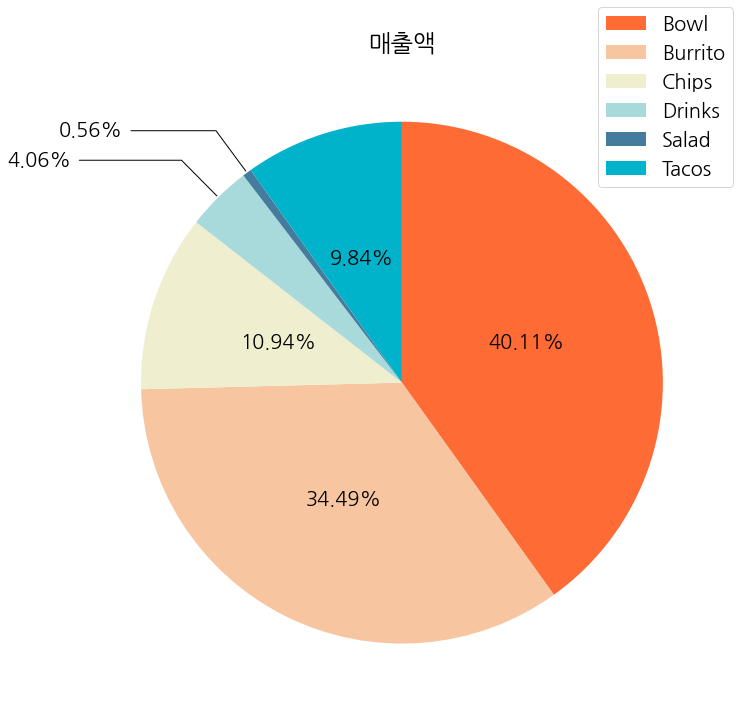

In [99]:
colors =['#FF6B35','#F7C59F','#EFEFD0','#A8DADC','#457B9D','#00B2CA', 'indigo', 'hotpink']
labels = df_result_sum.index
frequency = df_result_sum['item_price']

fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.rc('font', size=20)
plt.title('매출액')
plt.rc('font', family='NanumGothic')

pie = ax.pie(frequency, startangle=90, counterclock=False, colors = colors)
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5 ## 상한선 비율
sum_pct = 0 ## 퍼센티지
 
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
## annotation 설정
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
for i,l in enumerate(labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: 
        text = f'{100-sum_pct:.2f}%'
    
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) 
        y = np.sin(np.deg2rad(ang)) 
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.8*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=20)
    
plt.legend(pie[0],labels,loc=(0.8,0.8)) ## 범례
plt.show()

# 3. 카테고리별 파이차트(매출량 기준)

<Figure size 864x864 with 0 Axes>

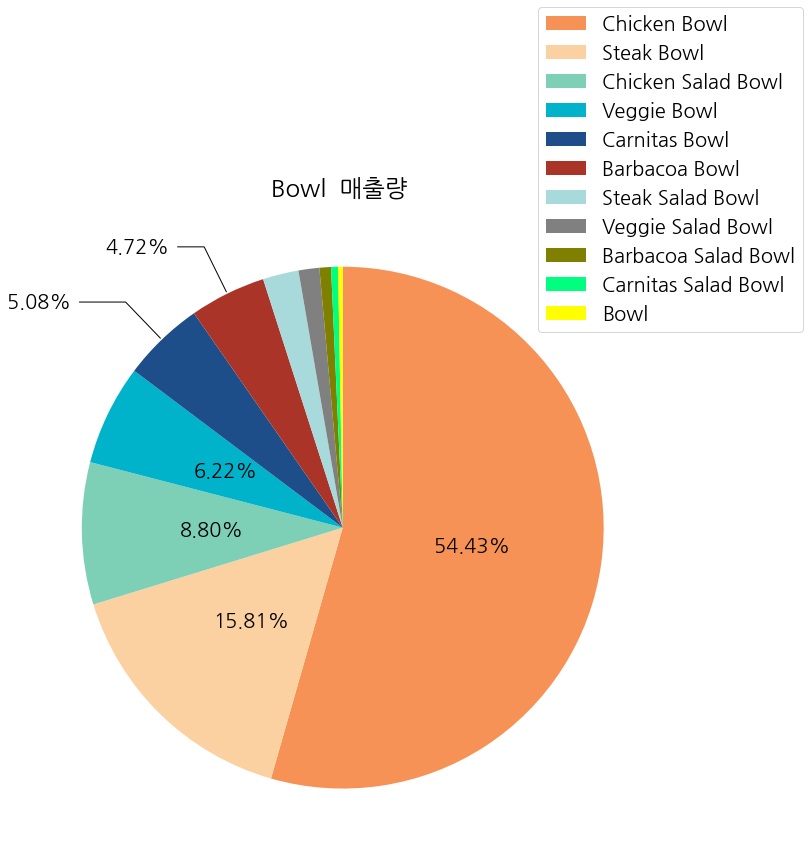

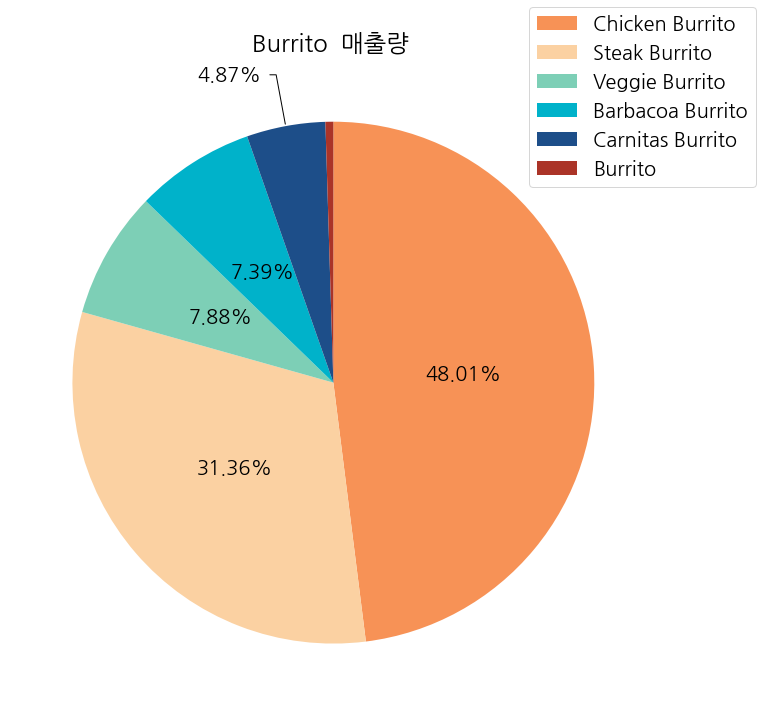

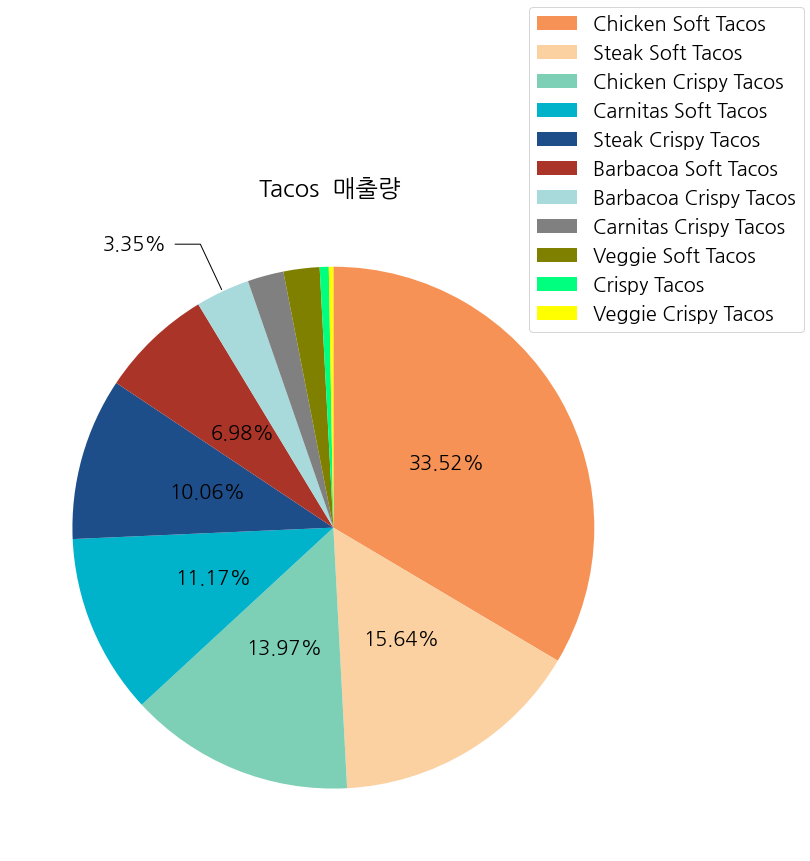

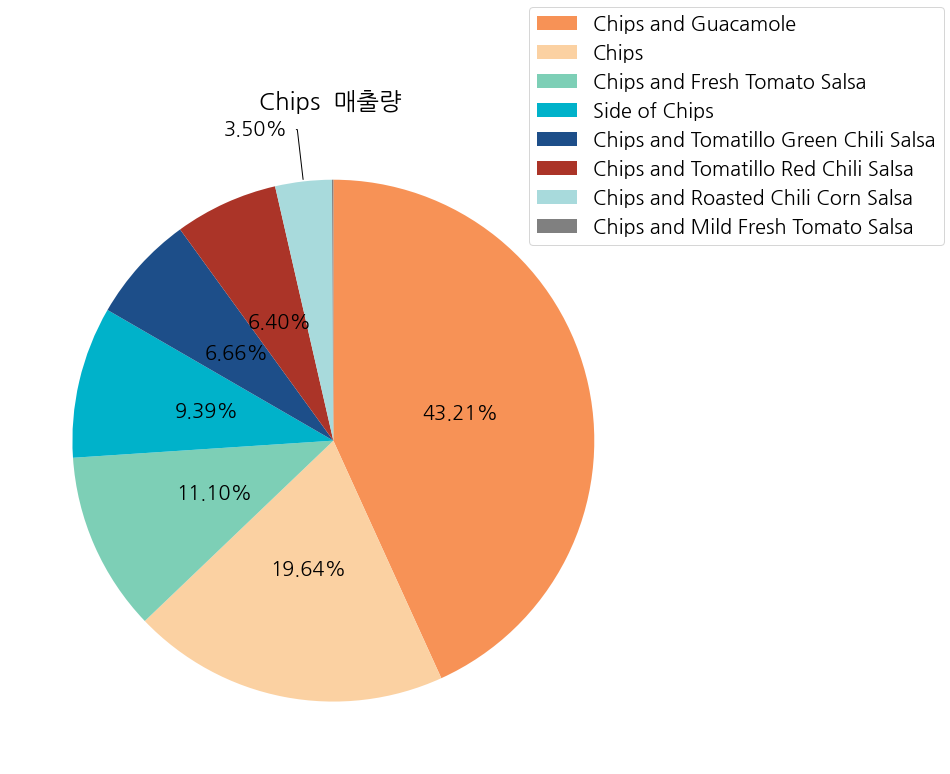

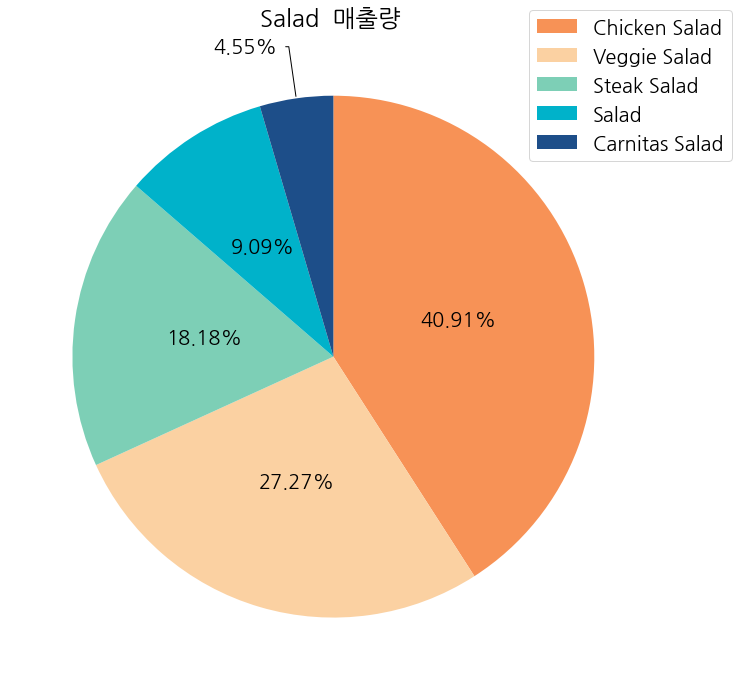

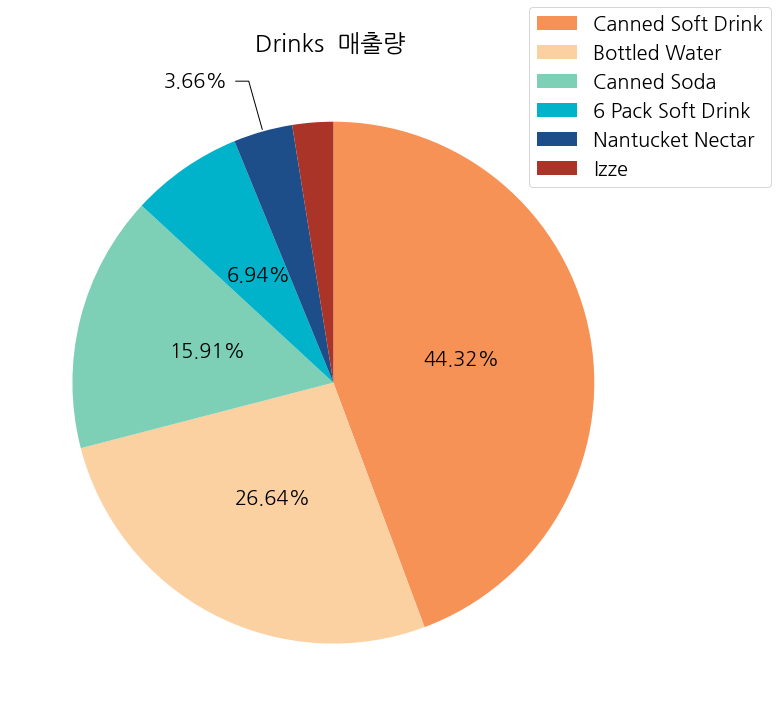

In [101]:
fig = plt.figure(figsize = (12,12))
menulist = ['Bowl','Burrito','Tacos','Chips','Salad','Drinks']
colors = ['#F79256', '#FBD1A2', '#7DCFB6', '#00B2CA', '#1D4E89', '#AB3428', '#A8DADC', 'grey', 'olive', 'springgreen', 'yellow'] ## 색상
for i in range(1,7):
    labels = df_result.groupby(df_result[df_result['category'] == menulist[i-1]].item_name).sum().quantity.sort_values(ascending = False).index
    frequency = df_result.groupby(df_result[df_result['category'] == menulist[i-1]].item_name).sum().quantity.sort_values(ascending = False).values
    fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
    ax = fig.add_subplot() ## 프레임 생성
    plt.rc('font', size=20)
    plt.title( menulist[i-1]+'  매출량 ')
    plt.rc('font', family='NanumGothic')

    pie = ax.pie(frequency, startangle=90, counterclock=False, colors = colors)
 
    total = np.sum(frequency) ## 빈도수 합
 
    threshold = 6 ## 상한선 비율
    sum_pct = 0 ## 퍼센티지
 
    bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
 
    ## annotation 설정
    config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
    for i,l in enumerate(labels):
        ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
        center, r = ax.patches[i].center, ax.patches[i].r 
    
        if i < len(labels) - 1:
            sum_pct += float(f'{frequency[i]/total*100:.2f}')
            text = f'{frequency[i]/total*100:.2f}%'
       
        else: 
            text = f'{100-sum_pct:.2f}%'
    
        if 3 < frequency[i]/total*100 < threshold:
            ang = (ang1+ang2)/2 ## 중심각
            x = np.cos(np.deg2rad(ang)) 
            y = np.sin(np.deg2rad(ang))         
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
            config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
            ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                        horizontalalignment=horizontalalignment, **config)
        elif frequency[i]/total*100 <3:
            ang = (ang1+ang2)/2 ## 중심각
            x = np.cos(np.deg2rad(ang)) 
            y = np.sin(np.deg2rad(ang))         
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
            config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
            
                
        else:
            x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
            y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
            ax.text(x,y,text,ha='center',va='center',fontsize=20)
    
    plt.legend(pie[0],labels,loc=(0.8,0.8)) ## 범례

    plt.show()

# 4. 주문량 순위

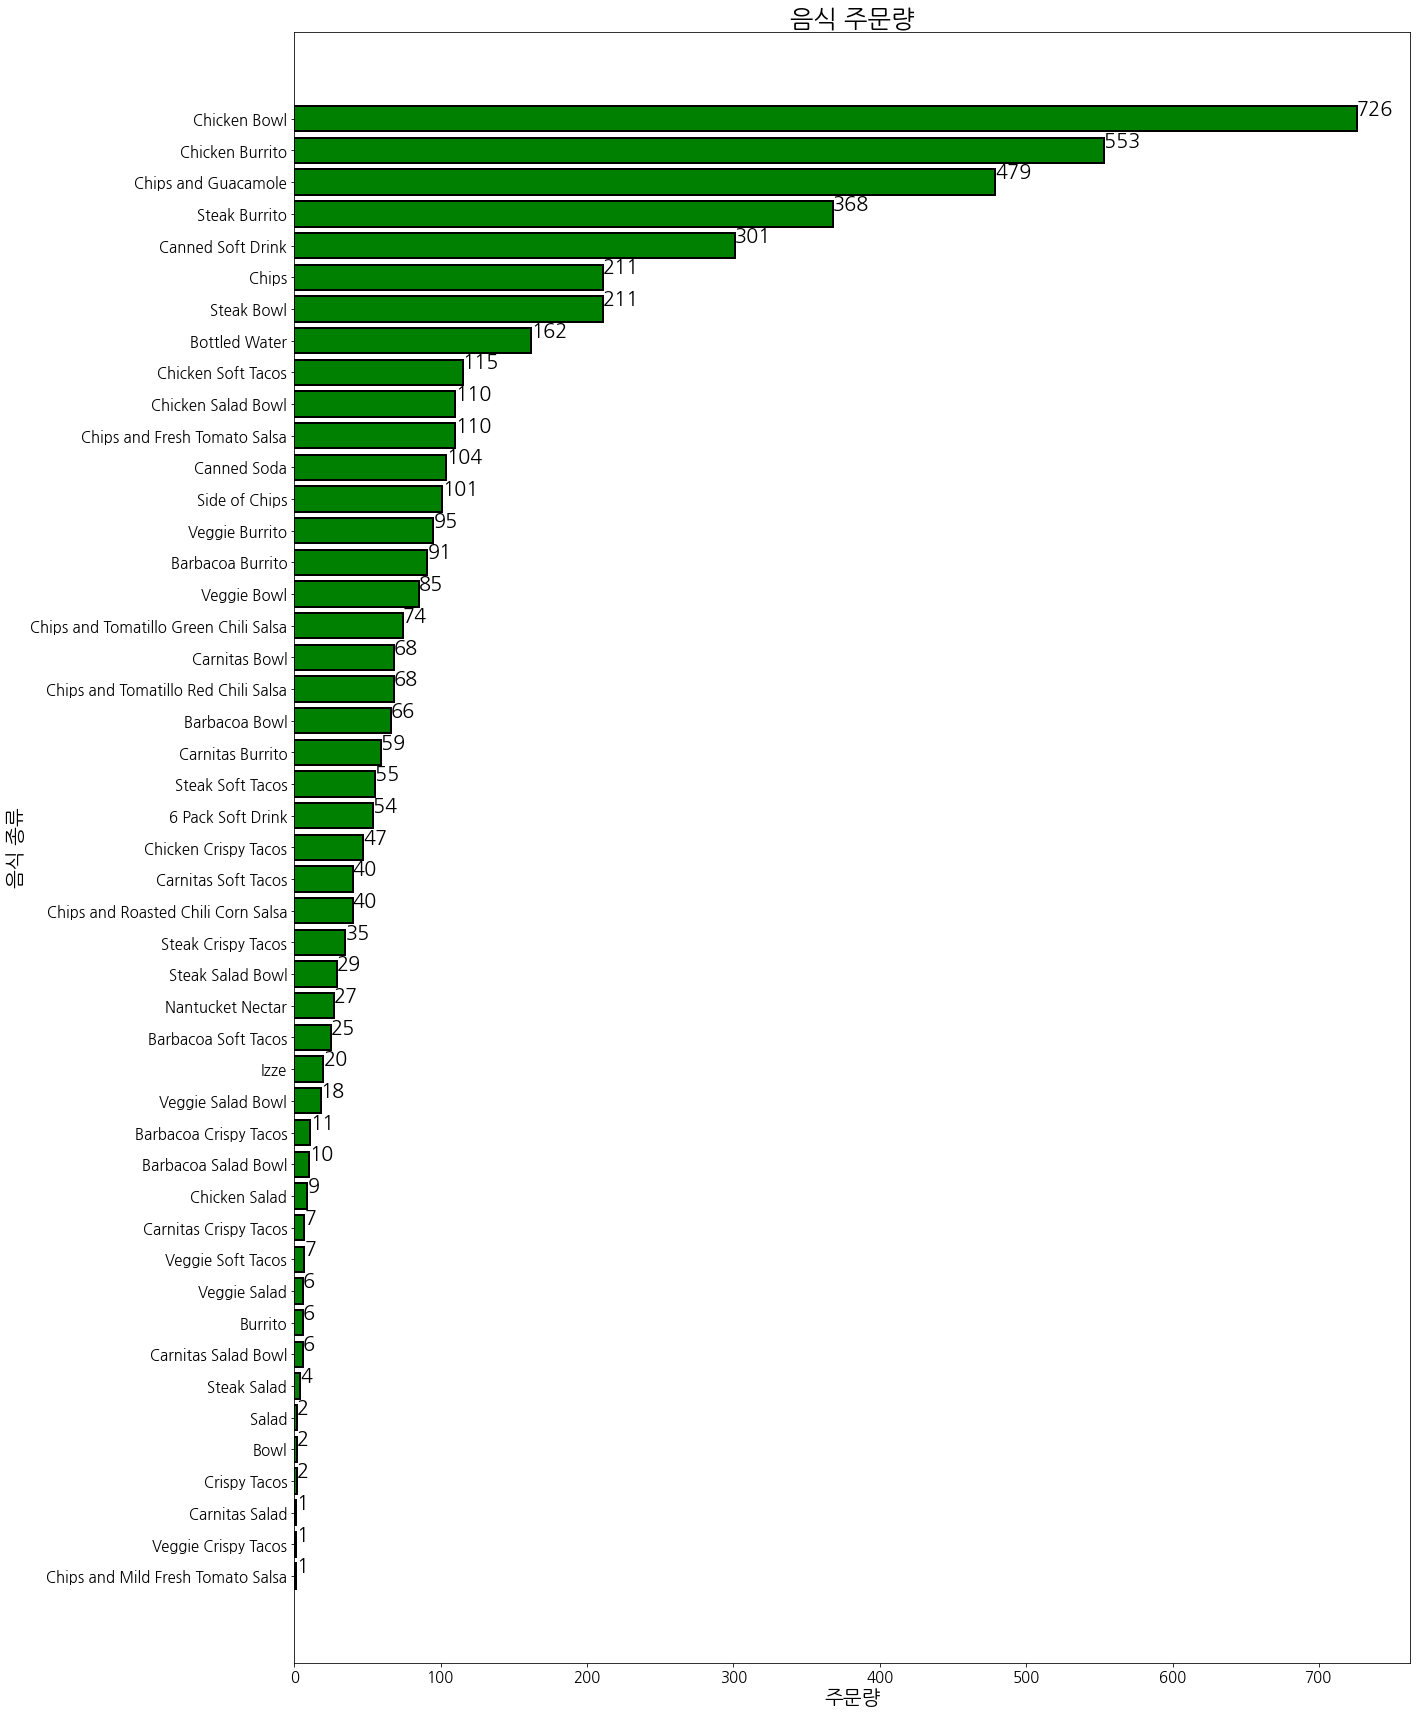

In [102]:
# 전체 막대 그래프
Rank = df_result['item_name'].value_counts().sort_values()
fig = plt.figure(figsize = (20,30))
plt.barh(Rank.index, Rank, color = 'green',edgecolor = 'black', linewidth = 2)
plt.title('음식 주문량', fontsize=25)
plt.ylabel('음식 종류', fontsize=20)
plt.xlabel('주문량', fontsize=20)
plt.xticks(fontsize =15) # 눈금
plt.yticks(fontsize =15)
for i, v in enumerate(Rank.index):
    plt.text(Rank[i], v, Rank[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 20, 
             color='k',
             horizontalalignment='left',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 
plt.show()

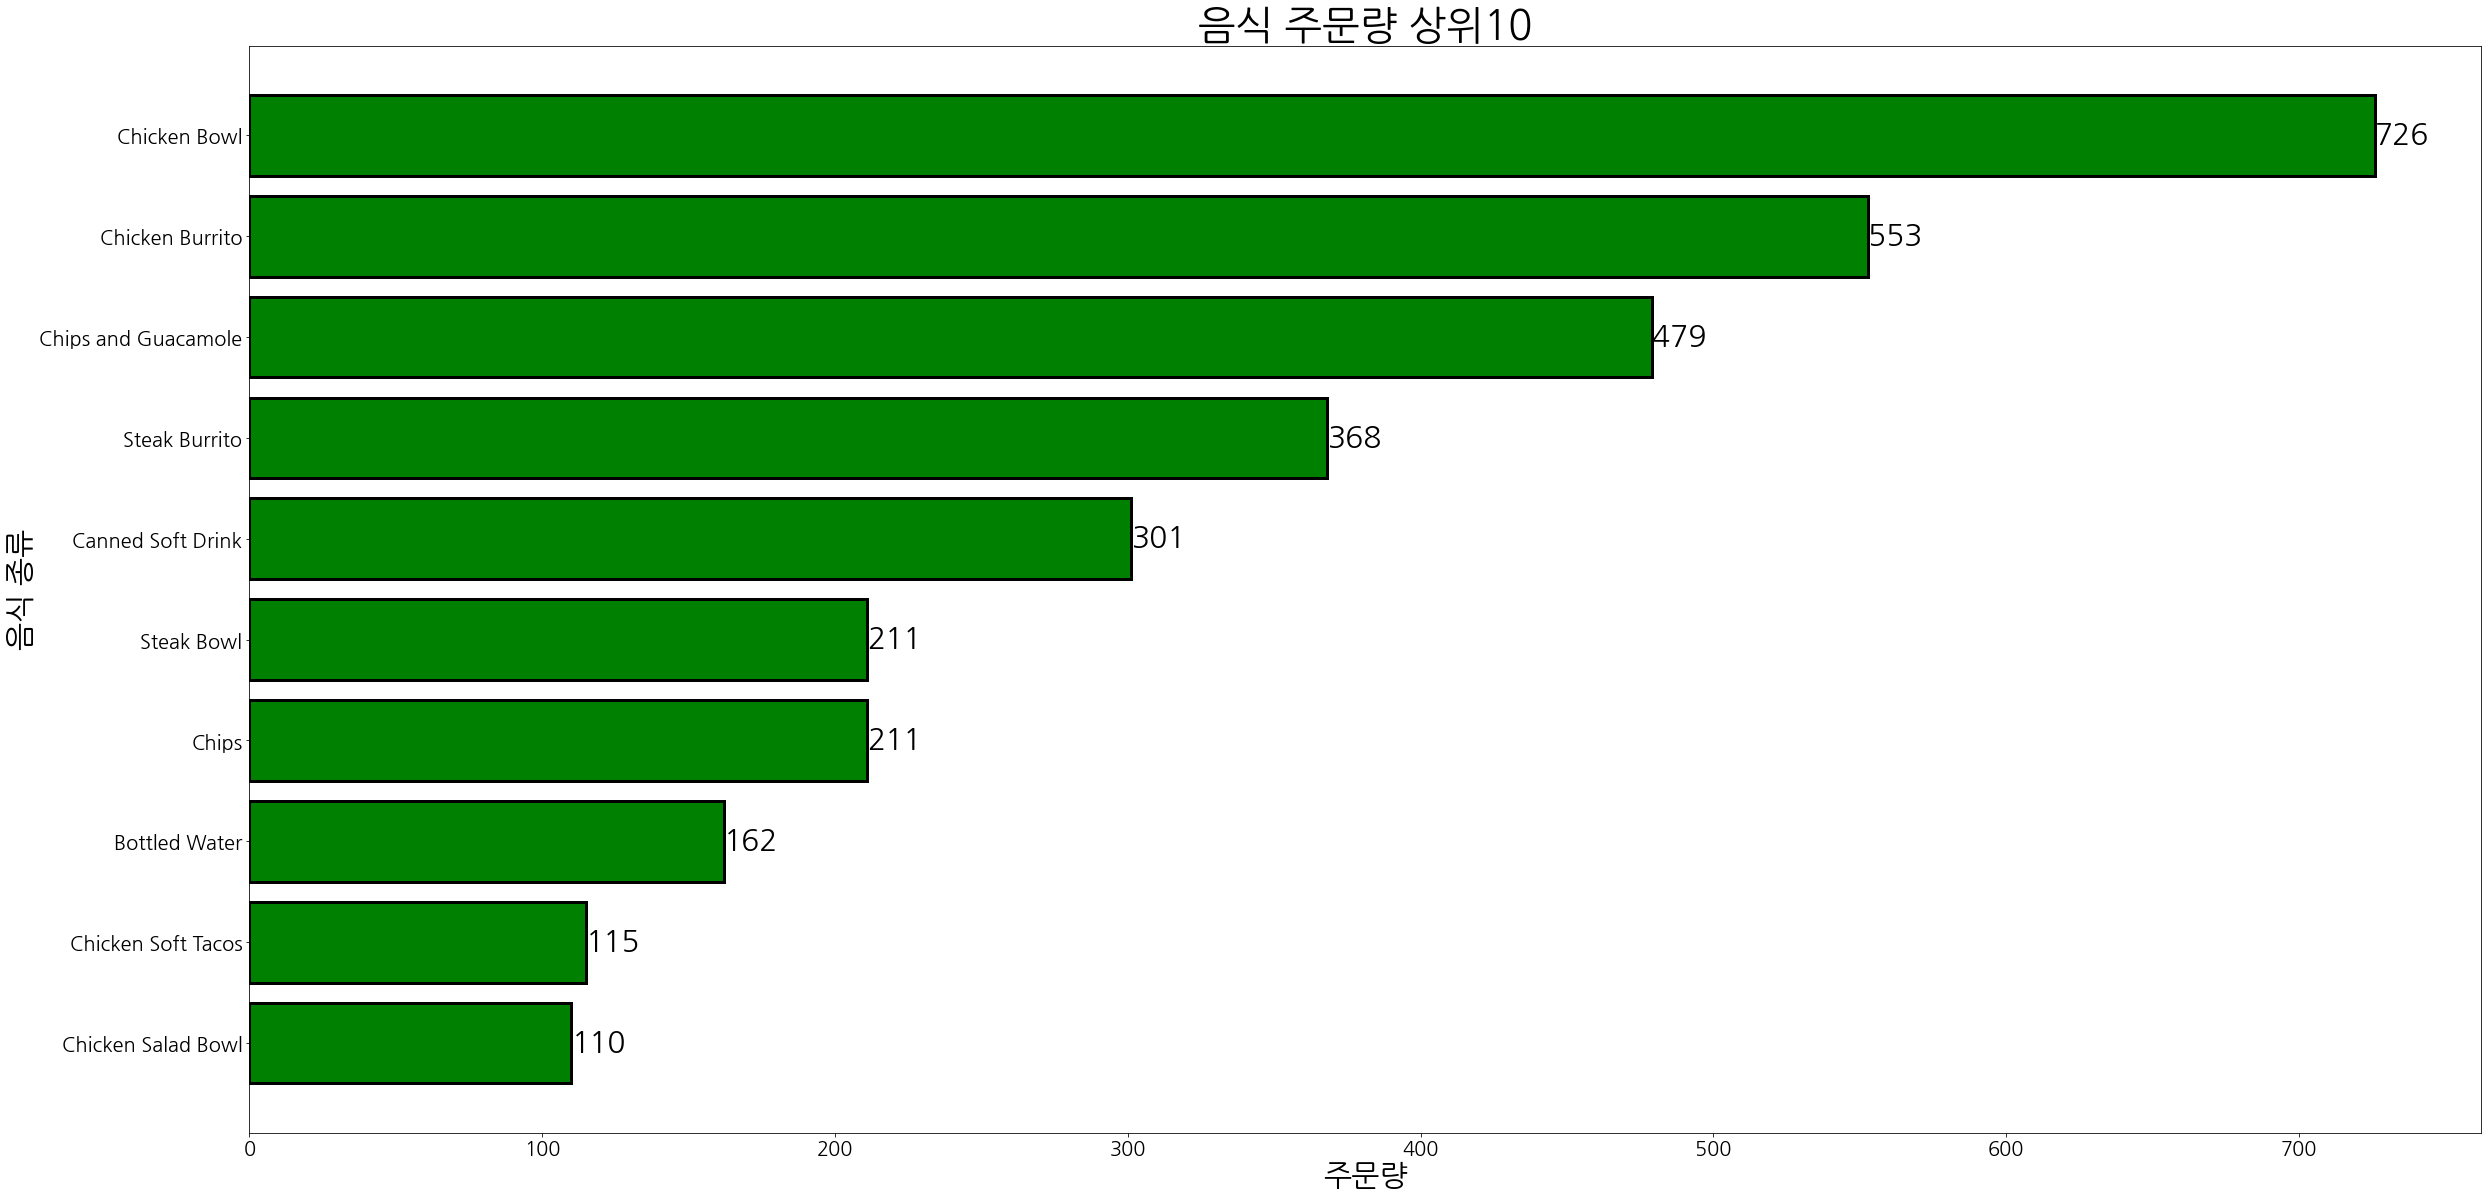

In [103]:
# 상위 막대 그래프
top_10 = df_result['item_name'].value_counts()[:10].sort_values()   # 음식 주문량 top 10 
fig = plt.figure(figsize = (40,20))
plt.barh(top_10.index, top_10, color = 'green',edgecolor = 'black', linewidth = 3)
plt.title('음식 주문량 상위10', fontsize=40)
plt.ylabel('음식 종류', fontsize=30)
plt.xlabel('주문량', fontsize=30)
plt.xticks(fontsize =20) # 눈금
plt.yticks(fontsize =20)
plt.rcParams['font.family'] = 'NanumGothic' # 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 깨짐 현상 고치는거

for i, v in enumerate(top_10.index):
    plt.text(top_10[i], v, top_10[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 30, 
             color='k',
             horizontalalignment='left',  # horizontalalignment (left, center, right)
             verticalalignment='center')    # verticalalignment (top, center, bottom)

plt.show()

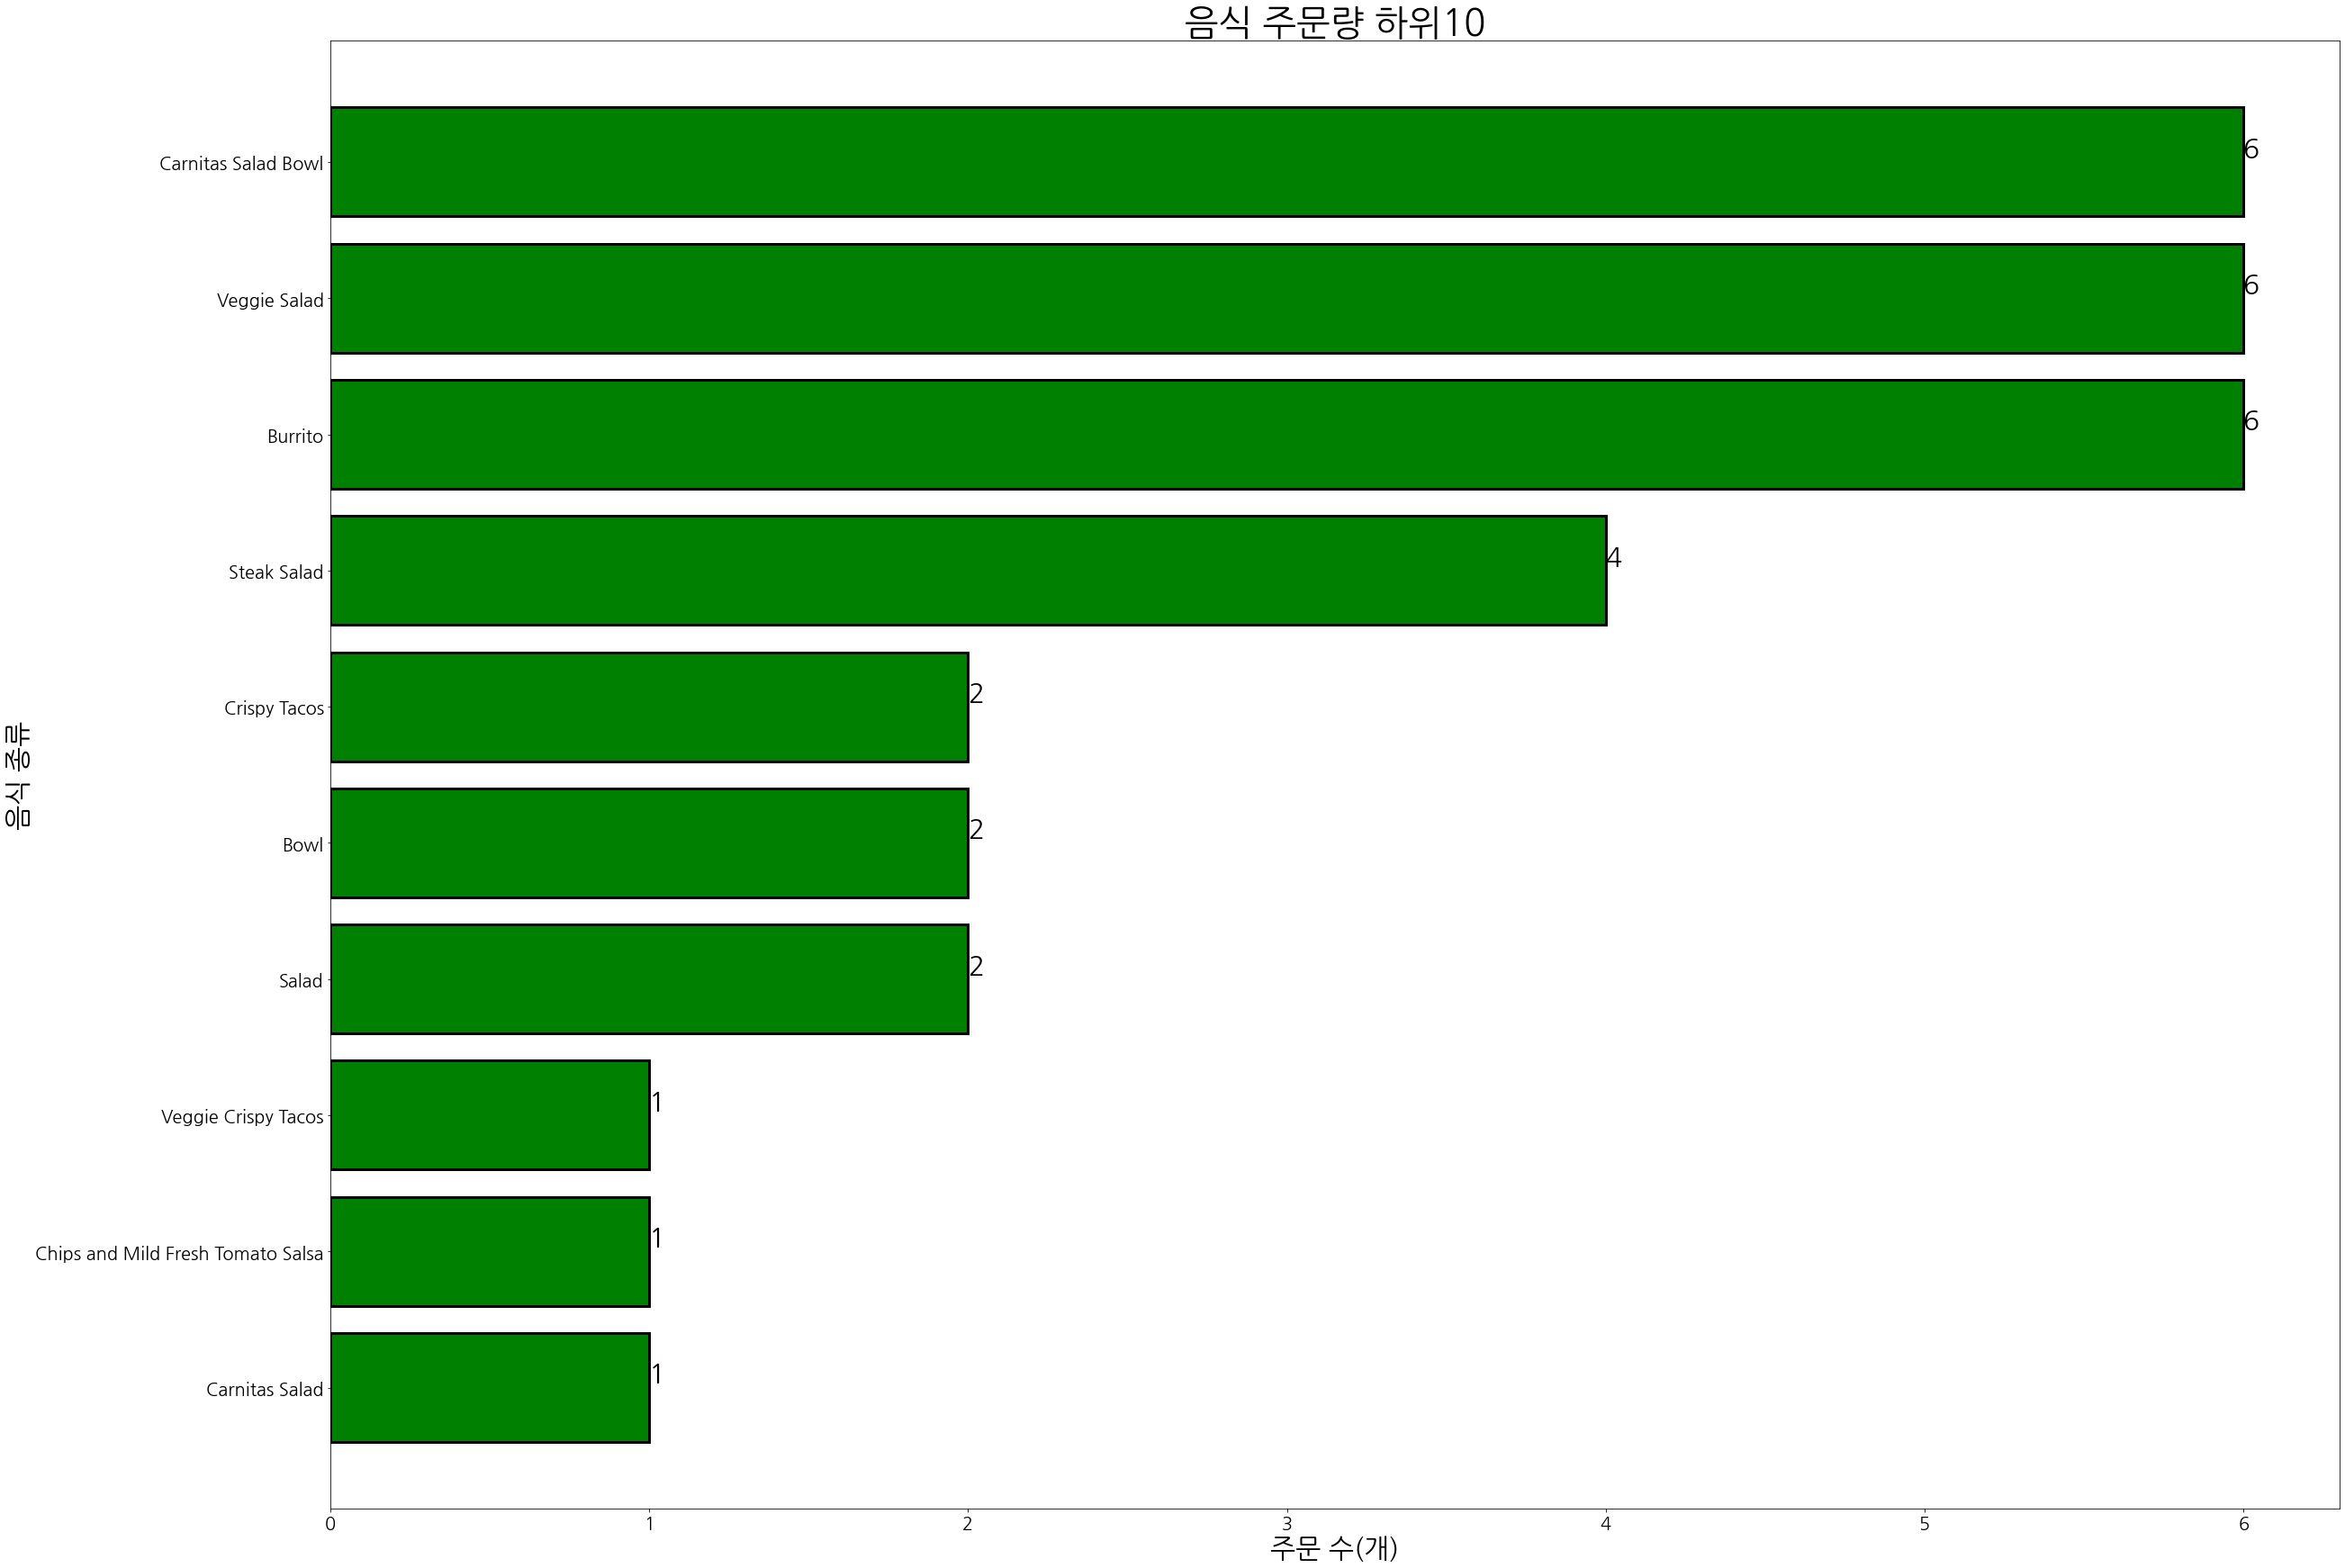

In [18]:
# 하위 막대 그래프
bottom_10 = df_result['item_name'].value_counts()[37:].sort_values()  
fig = plt.figure(figsize = (40,30))
plt.barh(bottom_10.index, bottom_10, color = 'green',edgecolor = 'black', linewidth = 3)
plt.title('음식 주문량 하위10', fontsize=40)
plt.ylabel('음식 종류', fontsize=30)
plt.xlabel('주문 수(개)', fontsize=30)
plt.xticks(fontsize =20) # 눈금
plt.yticks(fontsize =20)

for i, v in enumerate(bottom_10.index):
    plt.text(bottom_10[i], v, bottom_10[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 30, 
             color='k',
             horizontalalignment='left',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

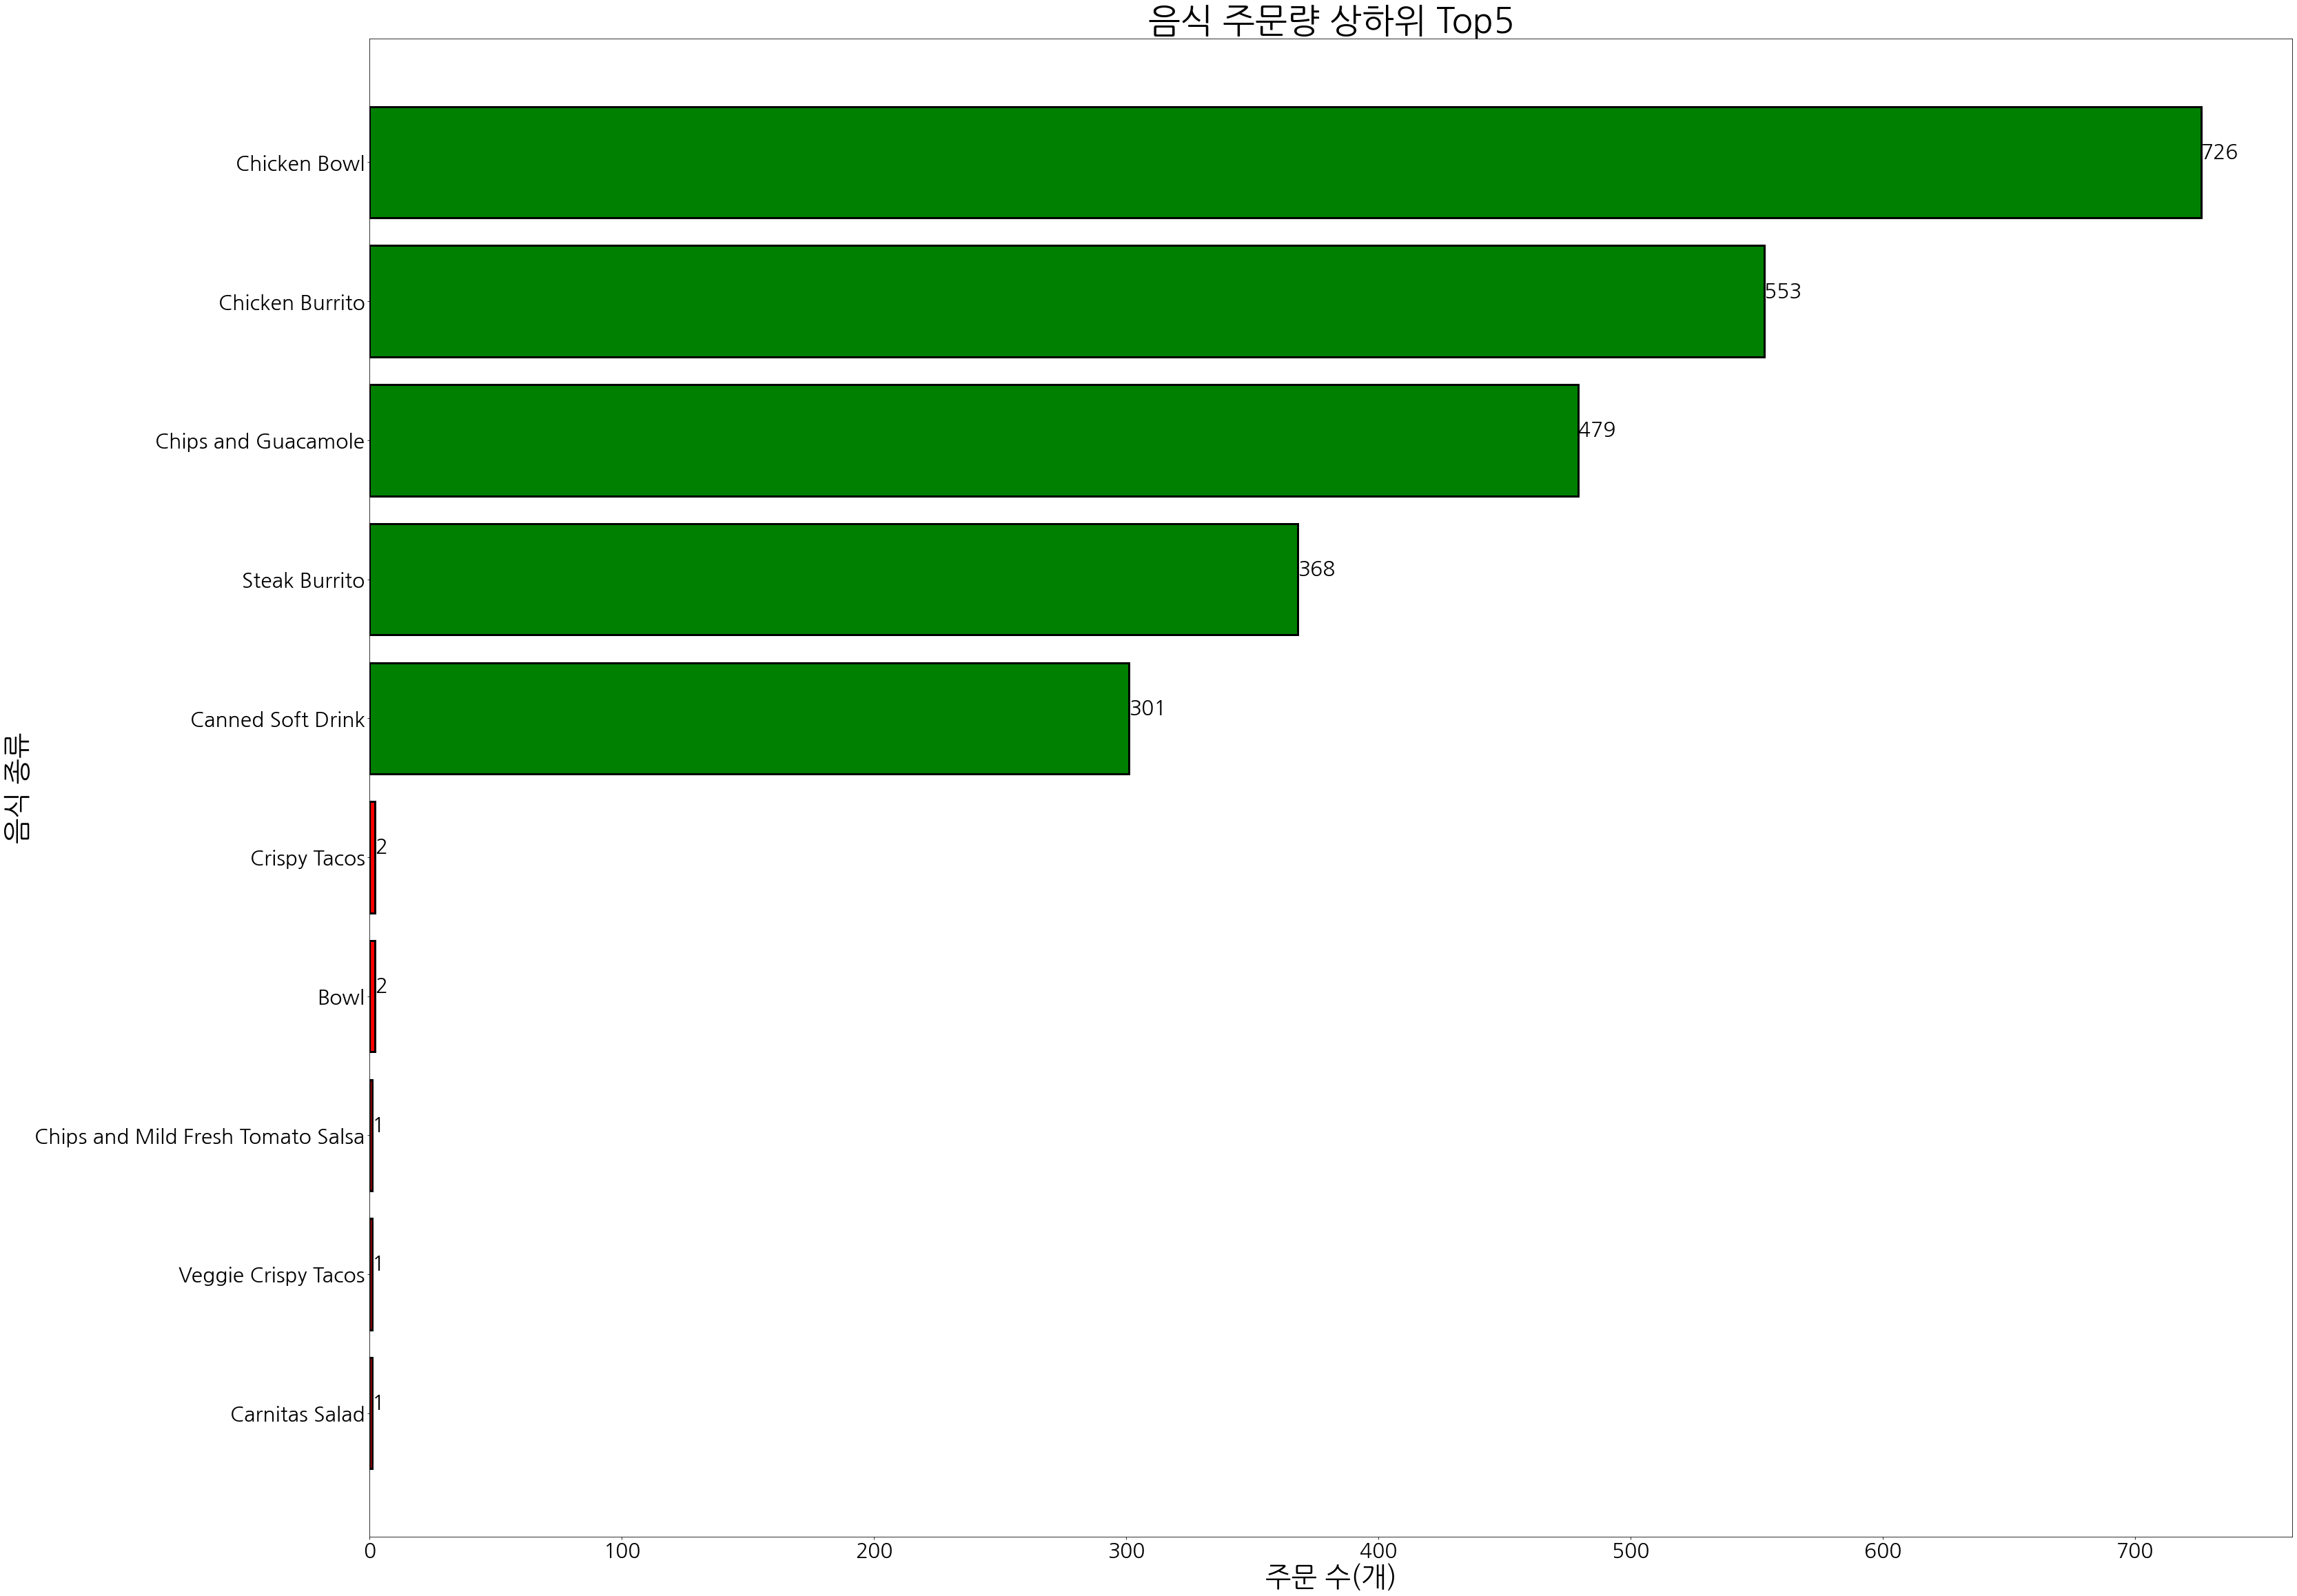

In [104]:
# 상하위 5개 막대그래프 

fig = plt.figure(figsize = (50,40))
bottom_5 = df_result['item_name'].value_counts()[42:].sort_values()
plt.barh(bottom_5.index, bottom_5,color = 'red',edgecolor = 'black', linewidth = 3)

top_5 = df_result['item_name'].value_counts()[:5].sort_values()
plt.barh(top_5.index, top_5, color = 'green',edgecolor = 'black', linewidth = 3)


plt.title('음식 주문량 상하위 Top5', fontsize=50)
plt.ylabel('음식 종류', fontsize=40)
plt.xlabel('주문 수(개)', fontsize=40)
plt.xticks(fontsize =30)
plt.yticks(fontsize =30)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

df_top_bottom_5 = pd.concat([top_5, bottom_5], axis=0)
for i, v in enumerate(df_top_bottom_5.index):
    plt.text(df_top_bottom_5[i], v, df_top_bottom_5[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 30, 
             color='k',
             horizontalalignment='left',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

# 5. 1인당 평균 주문량과 지불가격

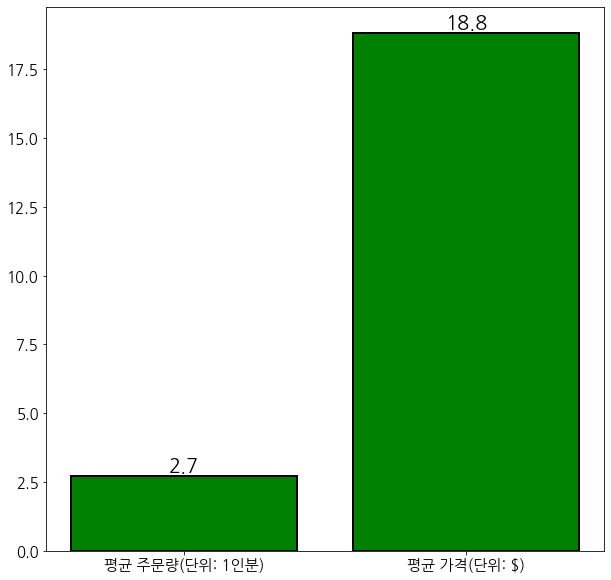

In [105]:
order_quantity_mean = df.groupby('order_id')['quantity'].sum().mean() 
# 아이디당 주문량을 구하고 평균을 냄 => order_id 하나당 평균 2.7인분을 주문
order_price_mean = df.groupby('order_id')['item_price'].sum().mean() 
# 아이디당 주문비용을 구하고 평균을 냄 => order_id 하나당 평균 18.8달러를 씀

fig = plt.figure(figsize = (10,10))

plt.bar(['평균 주문량(단위: 1인분)','평균 가격(단위: $)'],[order_quantity_mean, order_price_mean], color = 'green'
        ,edgecolor = 'black', linewidth = 2)
plt.text('평균 주문량(단위: 1인분)',order_quantity_mean, round(order_quantity_mean,1), fontsize = 20,
         horizontalalignment='center', verticalalignment='bottom')  
plt.text('평균 가격(단위: $)',order_price_mean, round(order_price_mean,1), fontsize = 20,
         horizontalalignment='center', verticalalignment='bottom')
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.show()

# 토핑 및 소스 분류

In [106]:
df_result['choice_description'].fillna('Nothing', inplace = True) # NaN값 Nothing으로 바꿈

# choice_description 값 중 '[', ']' 제거 후 ',' 로 split 하여 리스트로 바꿈.
for i in range(len(df_result['choice_description'])):
    for j in df_result['choice_description'][i]:
        if j == '[' or j ==']':
            df_result['choice_description'][i] = df_result['choice_description'][i].replace(j, '')
    df_result['choice_description'][i] = df_result['choice_description'][i].split(',')
    
# 각 리스트에 빈칸을 지우려고 strip을 실행.
for i in range(len(df_result['choice_description'])):
    for j in range(len(df_result['choice_description'][i])):
        df_result['choice_description'][i][j] = df_result['choice_description'][i][j].strip()

In [107]:
# 'Chicken Bowl' 의 토핑 , 소스가 뭔지
def tas(df, menu):
    side = []
    for i in df[df['item_name'] == menu]['choice_description']:
        for j in i:
            if j not in side:
                side.append(j)
    return side

#'Chicken Bowl' 의 토핑, 소스 개수 구하기
def count(df, menu, side):
    cnt = 0
    for i in df[df['item_name'] == menu]['choice_description']:
        for j in i:
            if j == side:
                cnt+= 1
    return cnt

def wts(df, menu):
    #'Chicken Bowl'선택해서 side에 다 집어넣음.
    plus = tas(df, menu)

    # 'Chicken Bowl' 의 사이드 개수를 구해 result에 다 집어 넣음.
    result = []
    for i in range(len(plus)):
        result.append(count(df, menu, plus[i]))

    #'Chicken Bowl' 데이터 프레임 만들기
    topping = pd.DataFrame({"토핑":plus, "수":result})
    topping.sort_values(by=['수'], ascending = False, inplace = True)
    topping.reset_index(drop = True, inplace = True)
    
    sauce_list = []
    topping_list = []
    for i in range(len(topping['토핑'])):
        if 'Salsa' in topping['토핑'][i]:
            sauce = topping.iloc[i].unique()
            sauce_list.append(sauce)
        else:
            top = topping.iloc[i].unique()
            topping_list.append(top)  

    if sauce_list:
        sauce = pd.DataFrame(sauce_list)
        sauce.columns = ['소스','개수']
        topping = pd.DataFrame(topping_list)
        topping.columns = ['토핑','개수']
        return topping, sauce
    else:
        return topping

In [108]:
topping_df, sauce_df = wts(df_result, 'Chicken Bowl') # 찾고싶은 메뉴 'Chicekn Bowl' 위치에 입력
topping_df

,토핑,개수
0,Rice,684
1,Cheese,549
2,Lettuce,443
3,Sour Cream,427
4,Black Beans,386
5,Guacamole,282
6,Fajita Vegetables,209
7,Pinto Beans,120
8,Fajita Veggies,87
9,Fresh Tomato (Mild),4


In [109]:
sauce_df

,소스,개수
0,Fresh Tomato Salsa,324
1,Roasted Chili Corn Salsa,106
2,Fresh Tomato Salsa (Mild),83
3,Tomatillo Green Chili Salsa,65
4,Tomatillo-Red Chili Salsa (Hot),65
5,Roasted Chili Corn Salsa (Medium),65
6,Tomatillo Red Chili Salsa,61
7,Tomatillo-Green Chili Salsa (Medium),21
